In [22]:
# Librairies basiques d'exploitation et visualization de données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import random # Pour pouvoir mélanger notre jeu de données

In [24]:
# Modules pour le pré-processing
from sklearn.base import TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA as ACP
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler, FunctionTransformer
from sklearn.utils import shuffle

# Module pour l'exploration de la projection factorielle
from fanalysis.pca import PCA

# Modèle pour la régression linéaire
from sklearn.linear_model import SGDRegressor

# Module pour l'affichage
from sklearn import set_config
set_config(display="diagram")

# Librairie pour la lecture et enregistrement des modèles
import pickle

In [25]:
import warnings
warnings.filterwarnings("ignore")

# Regression - Avec AFDM pour réduction de la dimensionalité et Régression Stochastique pour jeu de données large

In [94]:
df_train = pd.read_csv("df_sansNantypelocal.csv", sep="\t")

In [95]:
df_train.head()

,Unnamed: 0,Valeur fonciere,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,year,month,nom_departement,nom_region,pop_active,salaire_moyen,nb_etab_elem
0,0,90000.0,0,Maison,150.0,3,347.0,1.0,2018,1,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405
1,11,154200.0,0,Maison,180.0,6,680.0,1.0,2018,6,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405
2,13,184000.0,0,Maison,147.0,6,1725.0,1.0,2018,6,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405
3,14,300000.0,0,Local,1147.0,0,2693.0,1.0,2018,6,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405
4,17,181684.0,0,Maison,97.0,4,1050.0,1.0,2018,7,Ain,Auvergne-Rhône-Alpes,320682.0,15.336249,405


https://www.data.gouv.fr/fr/datasets/indicateurs-immobiliers-par-commune-et-par-annee-prix-et-volumes-sur-la-periode-2014-2021/

In [96]:
indic_immob = pd.read_csv("2021.csv")
indic_immob.head()

,Unnamed: 0,INSEE_COM,Annee,Nb_mutations,NbMaisons,NbApparts,PrixMoyen,Prixm2Moyen,SurfaceMoy
0,1,01001,2021,11,11.0,0.0,274126.818182,2551.272727,107.000000
1,2,01002,2021,3,3.0,0.0,163766.666667,1290.000000,120.666667
2,3,01004,2021,249,147.0,102.0,195581.831325,2313.823293,86.389558
3,4,01005,2021,22,18.0,4.0,290837.590909,2970.045455,99.590909
4,5,01006,2021,5,4.0,1.0,171560.000000,1631.800000,104.800000


In [134]:
indic_immob.loc[indic_immob["INSEE_COM"] == "78683"]

,Unnamed: 0,INSEE_COM,Annee,Nb_mutations,NbMaisons,NbApparts,PrixMoyen,Prixm2Moyen,SurfaceMoy
27030,27031,78683,2021,46,44.0,2.0,460481.1,3932.761,126.1087


In [98]:
indic_immob.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30876 entries, 0 to 30875
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    30876 non-null  int64  
 1   INSEE_COM     30875 non-null  object 
 2   Annee         30876 non-null  int64  
 3   Nb_mutations  30876 non-null  int64  
 4   NbMaisons     30875 non-null  float64
 5   NbApparts     30875 non-null  float64
 6   PrixMoyen     30876 non-null  float64
 7   Prixm2Moyen   30876 non-null  float64
 8   SurfaceMoy    30876 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 2.1+ MB


In [107]:
communes = pd.read_csv("communes-departement-region.csv")
communes.head()

,code_commune_INSEE,nom_commune_postal,code_postal,libelle_acheminement,ligne_5,latitude,longitude,code_commune,article,nom_commune,nom_commune_complet,code_departement,nom_departement,code_region,nom_region
0,1001,L ABERGEMENT CLEMENCIAT,1400,L ABERGEMENT CLEMENCIAT,NaN,46.153426,4.926114,1.0,L',Abergement-Clémenciat,L'Abergement-Clémenciat,1,Ain,84.0,Auvergne-Rhône-Alpes
1,1002,L ABERGEMENT DE VAREY,1640,L ABERGEMENT DE VAREY,NaN,46.009188,5.428017,2.0,L',Abergement-de-Varey,L'Abergement-de-Varey,1,Ain,84.0,Auvergne-Rhône-Alpes
2,1004,AMBERIEU EN BUGEY,1500,AMBERIEU EN BUGEY,NaN,45.960848,5.372926,4.0,NaN,Ambérieu-en-Bugey,Ambérieu-en-Bugey,1,Ain,84.0,Auvergne-Rhône-Alpes
3,1005,AMBERIEUX EN DOMBES,1330,AMBERIEUX EN DOMBES,NaN,45.996180,4.912273,5.0,NaN,Ambérieux-en-Dombes,Ambérieux-en-Dombes,1,Ain,84.0,Auvergne-Rhône-Alpes
4,1006,AMBLEON,1300,AMBLEON,NaN,45.749499,5.594320,6.0,NaN,Ambléon,Ambléon,1,Ain,84.0,Auvergne-Rhône-Alpes


In [138]:
communes.loc[communes["code_commune_INSEE"] == "78683"]

,code_commune_INSEE,nom_commune_postal,code_postal,libelle_acheminement,ligne_5,latitude,longitude,code_commune,article,nom_commune,nom_commune_complet,code_departement,nom_departement,code_region,nom_region,INSEE_COM
34225,78683,VILLIERS ST FREDERIC,78640,VILLIERS ST FREDERIC,NaN,48.820178,1.882508,683.0,NaN,Villiers-Saint-Frédéric,Villiers-Saint-Frédéric,78,Yvelines,11.0,Île-de-France,78683


In [110]:
communes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39201 entries, 0 to 39200
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_commune_INSEE    39201 non-null  object 
 1   nom_commune_postal    39201 non-null  object 
 2   code_postal           39201 non-null  int64  
 3   libelle_acheminement  39201 non-null  object 
 4   ligne_5               3257 non-null   object 
 5   latitude              38932 non-null  float64
 6   longitude             38932 non-null  float64
 7   code_commune          39194 non-null  float64
 8   article               2580 non-null   object 
 9   nom_commune           39201 non-null  object 
 10  nom_commune_complet   39201 non-null  object 
 11  code_departement      39194 non-null  object 
 12  nom_departement       38934 non-null  object 
 13  code_region           38934 non-null  float64
 14  nom_region            38934 non-null  object 
dtypes: float64(4), int6

In [136]:
def custom_code(row):
    if len(row) == 4:
        code = "0" + row
        return code
    else:
        return row

communes['INSEE_COM'] = communes["code_commune_INSEE"].apply(custom_code)


In [137]:
communes.head()

,code_commune_INSEE,nom_commune_postal,code_postal,libelle_acheminement,ligne_5,latitude,longitude,code_commune,article,nom_commune,nom_commune_complet,code_departement,nom_departement,code_region,nom_region,INSEE_COM
0,1001,L ABERGEMENT CLEMENCIAT,1400,L ABERGEMENT CLEMENCIAT,NaN,46.153426,4.926114,1.0,L',Abergement-Clémenciat,L'Abergement-Clémenciat,1,Ain,84.0,Auvergne-Rhône-Alpes,01001
1,1002,L ABERGEMENT DE VAREY,1640,L ABERGEMENT DE VAREY,NaN,46.009188,5.428017,2.0,L',Abergement-de-Varey,L'Abergement-de-Varey,1,Ain,84.0,Auvergne-Rhône-Alpes,01002
2,1004,AMBERIEU EN BUGEY,1500,AMBERIEU EN BUGEY,NaN,45.960848,5.372926,4.0,NaN,Ambérieu-en-Bugey,Ambérieu-en-Bugey,1,Ain,84.0,Auvergne-Rhône-Alpes,01004
3,1005,AMBERIEUX EN DOMBES,1330,AMBERIEUX EN DOMBES,NaN,45.996180,4.912273,5.0,NaN,Ambérieux-en-Dombes,Ambérieux-en-Dombes,1,Ain,84.0,Auvergne-Rhône-Alpes,01005
4,1006,AMBLEON,1300,AMBLEON,NaN,45.749499,5.594320,6.0,NaN,Ambléon,Ambléon,1,Ain,84.0,Auvergne-Rhône-Alpes,01006


In [139]:
# On fait une jointure interne entre les deux bases de données
prix  = pd.merge(communes, indic_immob, on="INSEE_COM", how='inner')
prix.head()

,code_commune_INSEE,nom_commune_postal,code_postal,libelle_acheminement,ligne_5,latitude,longitude,code_commune,article,nom_commune,...,nom_region,INSEE_COM,Unnamed: 0,Annee,Nb_mutations,NbMaisons,NbApparts,PrixMoyen,Prixm2Moyen,SurfaceMoy
0,1001,L ABERGEMENT CLEMENCIAT,1400,L ABERGEMENT CLEMENCIAT,NaN,46.153426,4.926114,1.0,L',Abergement-Clémenciat,...,Auvergne-Rhône-Alpes,01001,1,2021,11,11.0,0.0,274126.818182,2551.272727,107.000000
1,1002,L ABERGEMENT DE VAREY,1640,L ABERGEMENT DE VAREY,NaN,46.009188,5.428017,2.0,L',Abergement-de-Varey,...,Auvergne-Rhône-Alpes,01002,2,2021,3,3.0,0.0,163766.666667,1290.000000,120.666667
2,1004,AMBERIEU EN BUGEY,1500,AMBERIEU EN BUGEY,NaN,45.960848,5.372926,4.0,NaN,Ambérieu-en-Bugey,...,Auvergne-Rhône-Alpes,01004,3,2021,249,147.0,102.0,195581.831325,2313.823293,86.389558
3,1005,AMBERIEUX EN DOMBES,1330,AMBERIEUX EN DOMBES,NaN,45.996180,4.912273,5.0,NaN,Ambérieux-en-Dombes,...,Auvergne-Rhône-Alpes,01005,4,2021,22,18.0,4.0,290837.590909,2970.045455,99.590909
4,1006,AMBLEON,1300,AMBLEON,NaN,45.749499,5.594320,6.0,NaN,Ambléon,...,Auvergne-Rhône-Alpes,01006,5,2021,5,4.0,1.0,171560.000000,1631.800000,104.800000


In [140]:
prix.loc[prix["nom_departement"] == "Yvelines"]

,code_commune_INSEE,nom_commune_postal,code_postal,libelle_acheminement,ligne_5,latitude,longitude,code_commune,article,nom_commune,...,nom_region,INSEE_COM,Unnamed: 0,Annee,Nb_mutations,NbMaisons,NbApparts,PrixMoyen,Prixm2Moyen,SurfaceMoy
29104,78003,ABLIS,78660,ABLIS,NaN,48.528326,1.850965,3.0,NaN,Ablis,...,Île-de-France,78003,26778,2021,47,43.0,4.0,250331.9,2728.362,94.31915
29105,78005,ACHERES,78260,ACHERES,NaN,48.971799,2.090039,5.0,NaN,Achères,...,Île-de-France,78005,26779,2021,223,95.0,128.0,276685.6,3734.265,75.94170
29106,78006,ADAINVILLE,78113,ADAINVILLE,NaN,48.720154,1.662325,6.0,NaN,Adainville,...,Île-de-France,78006,26780,2021,15,15.0,0.0,455405.1,3685.400,128.66670
29107,78007,AIGREMONT,78240,AIGREMONT,NaN,48.900838,2.015363,7.0,NaN,Aigremont,...,Île-de-France,78007,26781,2021,21,20.0,1.0,658779.9,4926.190,141.47620
29108,78009,ALLAINVILLE,78660,ALLAINVILLE AUX BOIS,NaN,48.467805,1.902487,9.0,NaN,Allainville,...,Île-de-France,78009,26782,2021,3,3.0,0.0,287900.0,1664.333,171.33330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29376,78677,VILLETTE,78930,VILLETTE,NaN,48.926279,1.693742,677.0,NaN,Villette,...,Île-de-France,78677,27029,2021,7,7.0,0.0,290364.3,2766.143,110.28570
29377,78681,VILLIERS LE MAHIEU,78770,VILLIERS LE MAHIEU,NaN,48.853337,1.773800,681.0,NaN,Villiers-le-Mahieu,...,Île-de-France,78681,27030,2021,5,5.0,0.0,261352.0,2897.800,92.20000
29378,78683,VILLIERS ST FREDERIC,78640,VILLIERS ST FREDERIC,NaN,48.820178,1.882508,683.0,NaN,Villiers-Saint-Frédéric,...,Île-de-France,78683,27031,2021,46,44.0,2.0,460481.1,3932.761,126.10870
29379,78686,VIROFLAY,78220,VIROFLAY,NaN,48.802404,2.171513,686.0,NaN,Viroflay,...,Île-de-France,78686,27032,2021,287,78.0,209.0,479045.4,6520.544,71.24739


In [141]:
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

In [175]:
mean_m2_departement = pd.pivot_table(data=prix, index=["nom_departement"], values="Prixm2Moyen", aggfunc=["mean", q1, q3])
mean_m2_departement

,mean,q1,q3
,Prixm2Moyen,Prixm2Moyen,Prixm2Moyen
nom_departement,,,
Ain,2235.777587,1662.166667,2653.858156
Aisne,1289.592416,986.500000,1540.666667
Allier,1125.098839,886.875000,1298.196429
Alpes-Maritimes,3366.643302,2009.954545,4508.419449
Alpes-de-Haute-Provence,2106.623975,1713.250000,2410.000000
...,...,...,...
Vendée,1820.764662,1401.333500,2073.174500
Vienne,1230.351865,1001.500000,1442.333250


In [176]:
mean_m2_departement.columns = mean_m2_departement.columns.droplevel(0)

In [178]:
mean_m2_departement.columns = ["mean_prixm2", "q1_prixm2", "q3_prixm2"]

In [186]:
mean_m2_departement = mean_m2_departement.reset_index()
mean_m2_departement

,nom_departement,mean_prixm2,q1_prixm2,q3_prixm2
0,Ain,2235.777587,1662.166667,2653.858156
1,Aisne,1289.592416,986.500000,1540.666667
2,Allier,1125.098839,886.875000,1298.196429
3,Alpes-Maritimes,3366.643302,2009.954545,4508.419449
4,Alpes-de-Haute-Provence,2106.623975,1713.250000,2410.000000
...,...,...,...,...
89,Vendée,1820.764662,1401.333500,2073.174500
90,Vienne,1230.351865,1001.500000,1442.333250
91,Vosges,1143.733715,821.000000,1394.769000
92,Yonne,1279.941598,1031.484000,1456.083250


In [183]:
sum_mut_departement = pd.pivot_table(data=prix, index=["nom_departement"], values="Nb_mutations", aggfunc=["sum"])
sum_mut_departement

,sum
,Nb_mutations
nom_departement,
Ain,12389
Aisne,8306
Allier,5781
Alpes-Maritimes,89481
Alpes-de-Haute-Provence,3949
...,...
Vendée,18136
Vienne,8370


In [184]:
sum_mut_departement.columns = sum_mut_departement.columns.droplevel(0)

In [185]:
sum_mut_departement = sum_mut_departement.rename(columns={'': 'nom_departement', 'Nb_mutations': 'Total_Mutations'})
sum_mut_departement = sum_mut_departement.reset_index()
sum_mut_departement

,nom_departement,Total_Mutations
0,Ain,12389
1,Aisne,8306
2,Allier,5781
3,Alpes-Maritimes,89481
4,Alpes-de-Haute-Provence,3949
...,...,...
89,Vendée,18136
90,Vienne,8370
91,Vosges,5894
92,Yonne,9505


In [174]:
sum_mut_departement['Normalized_Mutations'] = sum_mut_departement['Total_Mutations'] / sum_mut_departement['Total_Mutations'].max()
sum_mut_departement


,Total_Mutations,Normalized_Mutations
nom_departement,,
Ain,12389,0.138454
Aisne,8306,0.092824
Allier,5781,0.064606
Alpes-Maritimes,89481,1.000000
Alpes-de-Haute-Provence,3949,0.044132
...,...,...
Vendée,18136,0.202680
Vienne,8370,0.093539
Vosges,5894,0.065869


In [191]:
df_train.shape

(2270205, 15)

In [190]:
df_train2 = pd.merge(df_train, mean_m2_departement, on="nom_departement", how="inner")
df_train2.shape

(2128550, 18)

In [192]:
df_train2 = pd.merge(df_train2, sum_mut_departement, on="nom_departement", how="inner")
df_train2.shape

(2128550, 19)

# Gestion des outliers

In [197]:
# On récupère les différents quartiles pour pouvoir enlever les biens avec un prix anormalement hauts comparés aux autres biens.
Q1, Q2, Q3 = df_train2['Valeur fonciere'].quantile([0.25, 0.5, 0.75])

# On calcule le rang interquartile
IQR = Q3-Q1

([<matplotlib.patches.Wedge at 0x2139af01c40>,
 [Text(-1.0841065670738843, 0.186314119774315, ''),
  Text(1.084106567073884, -0.1863141197743156, '')],
 [Text(-0.5913308547675732, 0.10162588351326271, '95%'),
  Text(0.5913308547675731, -0.10162588351326304, '5%')])

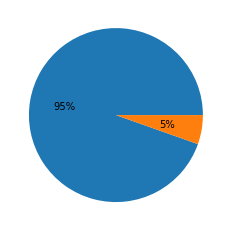

In [198]:
# On détexte les biens ayant un prix supérieur au troisième quartile multiplié par 1.5 fois le rang interquartile
outliers_max = df_train2["Valeur fonciere"] > (Q3 + 1.5*(IQR))
plt.pie(outliers_max.value_counts(), autopct='%.0f%%')

In [202]:
df_train2 = df_train2[df_train2["Valeur fonciere"] < (Q3 + 1.5*(IQR))]

([<matplotlib.patches.Wedge at 0x21345bfacd0>,
 [Text(-1.0910993302901728, 0.13965046165457815, ''),
  Text(1.0910993237526616, -0.13965051273262405, '')],
 [Text(-0.5951450892491851, 0.07617297908431533, '96%'),
  Text(0.5951450856832698, -0.07617300694506766, '4%')])

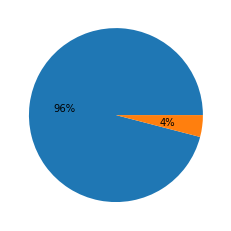

In [266]:
# On récupère les différents quartiles pour pouvoir enlever les biens avec un prix anormalement hauts comparés aux autres biens.
Q1, Q2, Q3 = df_train2['Surface terrain'].quantile([0.25, 0.5, 0.75])

# On calcule le rang interquartile
IQR = Q3-Q1
# On détexte les biens ayant un prix supérieur au troisième quartile multiplié par 1.5 fois le rang interquartile
outliers_max = df_train2["Surface terrain"] > (Q3 + 1.5*(IQR))
plt.pie(outliers_max.value_counts(), autopct='%.0f%%')

In [267]:
df_train2 = df_train2[df_train2["Surface terrain"] < (Q3 + 1.5*(IQR))]

In [269]:
df_train2.head()

,Valeur fonciere,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,year,month,nom_region,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations
0,90000.0,0,Maison,150.0,3,347.0,1.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
1,154200.0,0,Maison,180.0,6,680.0,1.0,2018,6,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
4,181684.0,0,Maison,97.0,4,1050.0,1.0,2018,7,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
5,149000.0,0,Maison,101.0,5,400.0,1.0,2018,8,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
7,194550.0,0,Maison,80.0,4,846.0,1.0,2018,11,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389


([<matplotlib.patches.Wedge at 0x2139afd1a60>,
 [Text(-1.099972642668993, 0.00775792367787725, ''),
  Text(1.0999726427711358, -0.007757909195348556, '')],
 [Text(-0.5999850778194507, 0.00423159473338759, '100%'),
  Text(0.599985077875165, -0.004231586833826484, '0%')])

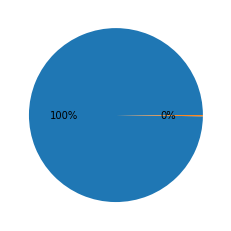

In [272]:
# On récupère les différents quartiles pour pouvoir enlever les biens avec un prix anormalement hauts comparés aux autres biens.
Q1, Q2, Q3 = df_train2['Nombre pieces principales'].quantile([0.25, 0.5, 0.75])

# On calcule le rang interquartile
IQR = Q3-Q1
# On détexte les biens ayant un prix supérieur au troisième quartile multiplié par 1.5 fois le rang interquartile
outliers_max = df_train2["Nombre pieces principales"] > (Q3 + 1.5*(IQR))
plt.pie(outliers_max.value_counts(), autopct='%.0f%%')

In [273]:
df_train2 = df_train2[df_train2["Nombre pieces principales"] < (Q3 + 1.5*(IQR))]

([<matplotlib.patches.Wedge at 0x213325b5880>,
 [Text(-1.098151172416645, 0.06374952956648376, ''),
  Text(1.0981511742818515, -0.06374949743637988, '')],
 [Text(-0.5989915485908973, 0.0347724706726275, '98%'),
  Text(0.5989915496082825, -0.03477245314711629, '2%')])

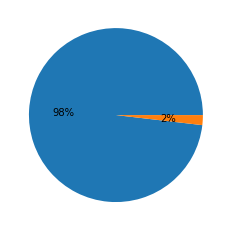

In [330]:
# On récupère les différents quartiles pour pouvoir enlever les biens avec un prix anormalement hauts comparés aux autres biens.
Q1, Q2, Q3 = df_train2['Surface reelle bati'].quantile([0.25, 0.5, 0.75])

# On calcule le rang interquartile
IQR = Q3-Q1
# On détexte les biens ayant un prix supérieur au troisième quartile multiplié par 1.5 fois le rang interquartile
outliers_max = df_train2["Surface reelle bati"] > (Q3 + 1.5*(IQR))
plt.pie(outliers_max.value_counts(), autopct='%.0f%%')

In [331]:
df_train2 = df_train2[df_train2["Surface reelle bati"] < (Q3 + 1.5*(IQR))]

In [276]:
df_train2.drop(columns=["Nombre de lots"], inplace=True)

In [201]:
df_train2.drop(columns=["nom_departement", "Unnamed: 0"], inplace=True)
df_train2.head()

,Valeur fonciere,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,year,month,nom_region,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations
0,90000.0,0,Maison,150.0,3,347.0,1.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
1,154200.0,0,Maison,180.0,6,680.0,1.0,2018,6,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
2,184000.0,0,Maison,147.0,6,1725.0,1.0,2018,6,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
3,300000.0,0,Local,1147.0,0,2693.0,1.0,2018,6,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
4,181684.0,0,Maison,97.0,4,1050.0,1.0,2018,7,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389


In [332]:
df_train2.head()

,Valeur fonciere,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,year,month,nom_region,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations
0,90000.0,Maison,150.0,3,347.0,1.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
1,154200.0,Maison,180.0,6,680.0,1.0,2018,6,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
4,181684.0,Maison,97.0,4,1050.0,1.0,2018,7,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
5,149000.0,Maison,101.0,5,400.0,1.0,2018,8,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
7,194550.0,Maison,80.0,4,846.0,1.0,2018,11,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389


In [400]:
df_train2 = df_train2[df_train2["Valeur fonciere"] > 50000]

In [406]:
X = df_train2.iloc[:,1:]
X.head()

,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,year,month,nom_region,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations
0,Maison,150.0,3,347.0,1.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
1,Maison,180.0,6,680.0,1.0,2018,6,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
4,Maison,97.0,4,1050.0,1.0,2018,7,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
5,Maison,101.0,5,400.0,1.0,2018,8,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
7,Maison,80.0,4,846.0,1.0,2018,11,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389


In [407]:
y = df_train2.iloc[:,0]
y.head()

0     90000.0
1    154200.0
4    181684.0
5    149000.0
7    194550.0
Name: Valeur fonciere, dtype: float64

## Création de la pipeline

In [205]:
class DropUnnecess_Column(TransformerMixin):
    def __init__(self, columns):
        self.columns=columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.drop(self.columns, axis=1)

In [206]:
from sklearn.impute import SimpleImputer

SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
    

SimpleImputer(fill_value=0, strategy='constant')

In [207]:
class Extract_YearMonth(TransformerMixin):
    def __init__(self, column_datetime, format):
        self.column_name = column_datetime
        self.format_time = format

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()
        pd.to_datetime(X_copy[self.column_name] , format=self.format_time)
        X_copy.loc[:,"year"] =  pd.DatetimeIndex(X_copy[self.column_name]).year
        X_copy.loc[:,"month"] =  pd.DatetimeIndex(X_copy[self.column_name]).month
        X_copy.drop(columns=[self.column_name], inplace=True)
        
        return  X_copy
     

In [208]:
class OpenData_Departement(TransformerMixin):
    def __init__(self, path, var_join):
        if ".xlsx" in path:
            self.df_open_data = pd.read_excel(path)
        elif ".csv" in path: 
            self.df_open_data = pd.read_csv(path)
        self.var_join = var_join
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_merged = pd.merge(X, self.df_open_data, on=self.var_join, how="inner")
        return X_merged
        

In [38]:
cleaning = Pipeline(
    steps=[("droping", DropUnnecess_Column(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI','No disposition', 'No plan', 
       'Identifiant local', 'No Volume', 'B/T/Q', '1er lot','Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot','Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       "Nature culture", "Nature culture speciale", "Prefixe de section", "Section", "Nature mutation", "Type de voie", "Voie", "No voie", "Code voie",
       "Code departement"])),
       ("date", Extract_YearMonth("Date mutation", format="%d/%m/%Y")),
       ("pop_active", OpenData_Departement("pop_active.xlsx", "nom_departement")),
       ("salaire", OpenData_Departement("base-cc-bases-tous-salaries-2021.xlsx", "nom_departement")),
       ("ecole", OpenData_Departement("ecoles2.xlsx", "nom_departement"))
         ]
)

cleaning

Pipeline(steps=[('droping',
                 <__main__.DropUnnecess_Column object at 0x0000021331C19670>),
                ('date',
                 <__main__.Extract_YearMonth object at 0x0000021331C19130>),
                ('pop_active',
                 <__main__.OpenData_Departement object at 0x0000021331C19340>),
                ('salaire',
                 <__main__.OpenData_Departement object at 0x000002132F81A7C0>),
                ('ecole',
                 <__main__.OpenData_Departement object at 0x0000021331BFAE80>)])

In [209]:
# Création d'un objet qui imputera les valeurs manquantes de la variable type local 

class DecisionTreeImputer(TransformerMixin):

    def __init__(self, model_path):
        with open(model_path, 'rb') as file:
            self.model = pickle.load(file) # On charge le modèle d'arbre de classification

    # Comme nous chargons le modèle, il n'y a pas de fit
    def fit(self, X, y=None):
        return self

    # Notre transform impute les valeurs manquantes en se basant sur les prédictions de notre arbre de classification.
    def transform(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
            
        X_filled = X.copy()
        
        # Pour chaque colonne de notre dataset,
        for column in X_filled.columns:
            # On récupère les indexs des individus ayant une valeur nulle
            missing_indices = X_filled[column].isnull()
            # S'il existe au moins un index avec une valeur manquante
            if missing_indices.any():
                # On utilise la prédiction du modèle pour remplir la valeur.
                predictions = self.model.predict(X_filled[missing_indices].values)
                X_filled.loc[missing_indices, column] = predictions
        
        # On retourne notre dataframe 
        return X_filled.values

In [210]:
class Qual_Standardize(TransformerMixin):

    # On standardize les valeurs qualitatives en utilisant la racine carré de p_k.
    def __init__(self):
        self.p_k = None

    # Notre fit calcule la valeur p_k nécessaire à la transformation.
    def fit(self, X, y=None):
        qual_int = X.astype(int)
        # On calcule la valeur p_k comme la proportion de True dans la colonne
        self.p_k = np.sum(qual_int, axis=0) / qual_int.shape[0]
        return self

    def transform(self, X, y=None):
        qual_int = X.astype(int)    
        # On transforme chaque valeur du tableau disjonctif complet par la racine carré de p_k
        qual_trans = qual_int / (np.sqrt(self.p_k))

        return qual_trans

In [408]:
# On déclare nos variables quantitatives
quant_columns = ['Surface reelle bati', 'Nombre pieces principales',
       'Surface terrain','month','pop_active',
       'salaire_moyen', 'nb_etab_elem', "mean_prixm2","q1_prixm2","q3_prixm2","Total_Mutations"]

# On déclare nos variables quantitatives
cat_columns = [ 'exterieur', 'nom_region']

In [409]:
# On crée une première pipeline qui va centrer et réduire nos variables quantitatives
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),
        ("scaler", StandardScaler())]
)


# On crée une seconde pipeline qui va créer un tableau disjonctif de notre variable qualitative puis la standardiser
categorical_transformer = Pipeline(
    steps=[("disjonctif", OneHotEncoder(handle_unknown="error")),
            ("standardize", Qual_Standardize())

    ]
)

# On crée une troisième pipeline qui va imputer les valeurs manquantes, créer un tableau disjonctif de notre variable type local puis la standardiser
local_transformer = Pipeline(
    steps=[("na_imputer", DecisionTreeImputer(model_path='tree_classif_typelocal2.pkl')),
        ("disjonctif", OneHotEncoder(handle_unknown="error")),
        ("standardize", Qual_Standardize())

    ]
)

# On crée un ColumnTransformer qui appliquera nos pipelines selon si elles sont qualitatives, quantitatives ou si c'est "Type local"
preprocessor = ColumnTransformer(
    transformers=[

        ("num", numeric_transformer, quant_columns),
        ("cat", categorical_transformer, cat_columns),
        ('local', local_transformer, ["Type local"])
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('scaler', StandardScaler())]),
                                 ['Surface reelle bati',
                                  'Nombre pieces principales',
                                  'Surface terrain', 'month', 'pop_active',
                                  'salaire_moyen', 'nb_etab_elem',
                                  'mean_prixm2', 'q1_prixm2', 'q3_prixm2',
                                  'Total_Mutations']),
                                ('cat',
                                 Pipeline(steps=[('disjonctif',
                                                  OneHotEncoder()),
                                                 ('standardize',
                                                  <__main__.Qual_Standardize object at 0x00000213C0F498E0>)]),
                                 ['exterieur', 'nom_region']),
                                ('local',
                                 Pipeline(steps=[('na_imputer',
                                                  <__main__.DecisionTreeImputer object at 0x00000213C0F49A30>),
                                                 ('disjonctif',
                                                  OneHotEncoder()),
                                                 ('standardize',
                                                  <__main__.Qual_Standardize object at 0x00000213807F2F10>)]),
                                 ['Type local'])])

In [410]:
# On convertit notre variable extérieur en booléen.
X["exterieur"] = X["exterieur"].astype(bool)

In [411]:
# On divise notre jeu de données en un échantillon d'apprentissage et un test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [412]:
X_train.head()

,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,year,month,nom_region,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations
214832,Maison,104.0,5,291.0,True,2020,11,Occitanie,156327.0,13.332030,274,1515.932444,1149.10000,1761.045455,17545
1912256,Dépendance,0.0,0,12.0,True,2019,10,Île-de-France,636748.0,17.849039,470,3262.875189,2807.92475,3656.625250,19873
2088250,Appartement,51.0,2,0.0,False,2020,5,Île-de-France,702047.0,18.863818,341,4918.896176,3767.87150,6025.591000,19913
1670616,Maison,88.0,3,487.0,True,2020,7,Île-de-France,703121.0,22.921015,583,3516.851191,2808.90100,4008.104000,24785
1609628,Maison,70.0,3,101.0,True,2019,12,Île-de-France,706910.0,16.824866,716,2635.590898,1969.53350,3163.678500,24870


In [413]:
y_train.head()

214832     165000.0
1912256    115000.0
2088250    457500.0
1670616    158000.0
1609628    260000.0
Name: Valeur fonciere, dtype: float64

## Application de notre pipeline

In [414]:
X_train_preprocessed = preprocessor.fit_transform(X_train, y_train)

In [415]:
# On récupère les noms de colonnes de notre tableau disjonctif de nos variables qualitatives
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['disjonctif'].get_feature_names_out(cat_columns)
cat_feature_names

array(['exterieur_False', 'exterieur_True',
       'nom_region_Auvergne-Rhône-Alpes',
       'nom_region_Bourgogne-Franche-Comté', 'nom_region_Bretagne',
       'nom_region_Centre-Val de Loire', 'nom_region_Corse',
       'nom_region_Grand Est', 'nom_region_Hauts-de-France',
       'nom_region_Normandie', 'nom_region_Nouvelle-Aquitaine',
       'nom_region_Occitanie', 'nom_region_Pays de la Loire',
       "nom_region_Provence-Alpes-Côte d'Azur",
       'nom_region_Île-de-France'], dtype=object)

In [416]:
# On récupère les noms de colonnes de notre tableau disjonctif de la variable type local
local_feature_names = preprocessor.named_transformers_['local'].named_steps['disjonctif'].get_feature_names_out(input_features=["Type local"])
local_feature_names

array(['Type local_Appartement', 'Type local_Dépendance',
       'Type local_Local', 'Type local_Maison'], dtype=object)

In [417]:
# On crée une liste avec toutes nos variables (dans l'ordre de la pipeline)
all_feature_names = np.concatenate([quant_columns, cat_feature_names,local_feature_names ])

In [418]:
# On transforme notre échantillon d'apprentissage
X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
X_train_preprocessed

,Surface reelle bati,Nombre pieces principales,Surface terrain,month,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,...,nom_region_Normandie,nom_region_Nouvelle-Aquitaine,nom_region_Occitanie,nom_region_Pays de la Loire,nom_region_Provence-Alpes-Côte d'Azur,nom_region_Île-de-France,Type local_Appartement,Type local_Dépendance,Type local_Local,Type local_Maison
0,0.824831,1.069645,0.179196,1.260478,-1.118306,-0.976728,-0.826346,-0.779115,-0.720097,-0.818979,...,0.0,0.000000,2.949205,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.318814
1,-1.800572,-1.750947,-0.772727,0.967869,0.525312,0.978709,-0.103144,0.810717,1.047713,0.697728,...,0.0,0.000000,0.000000,0.000000,0.0,2.581928,0.000000,3.136037,0.0,0.000000
2,-0.513115,-0.622710,-0.813670,-0.495172,0.748713,1.418012,-0.579129,2.317804,2.070729,2.593205,...,0.0,0.000000,0.000000,0.000000,0.0,2.581928,1.857529,0.000000,0.0,0.000000
3,0.420923,-0.058592,0.847931,0.090044,0.752387,3.174394,0.313805,1.041852,1.048754,0.978956,...,0.0,0.000000,0.000000,0.000000,0.0,2.581928,0.000000,0.000000,0.0,1.318814
4,-0.033474,-0.058592,-0.469067,1.553086,0.765350,0.535339,0.804549,0.239847,0.154240,0.303308,...,0.0,0.000000,0.000000,0.000000,0.0,2.581928,0.000000,0.000000,0.0,1.318814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085464,0.017015,1.069645,1.438192,-0.495172,-1.177431,-0.809329,-0.866934,-1.016354,-0.842365,-1.123616,...,0.0,0.000000,0.000000,3.920392,0.0,0.000000,0.000000,0.000000,0.0,1.318814
1085465,2.011312,1.069645,2.110338,0.967869,1.034736,0.181920,0.612679,-0.063021,-0.224564,-0.033589,...,0.0,3.131147,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.318814
1085466,-0.058718,-0.058592,-0.813670,0.675261,1.034736,0.181920,0.612679,-0.063021,-0.224564,-0.033589,...,0.0,3.131147,0.000000,0.000000,0.0,0.000000,1.857529,0.000000,0.0,0.000000
1085467,0.622877,1.069645,-0.288236,-0.202564,1.034736,0.181920,0.612679,-0.063021,-0.224564,-0.033589,...,0.0,3.131147,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.318814


# Decision Tree Regressor

In [497]:
from sklearn.tree import DecisionTreeRegressor

In [498]:
regressor = DecisionTreeRegressor(random_state=0)

In [499]:
regressor.fit(X_train_preprocessed, y_train)

DecisionTreeRegressor(random_state=0)

In [501]:
X_test.head()

,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,year,month,nom_region,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations
2016893,Appartement,40.0,2,0.0,False,2021,1,Île-de-France,789988.0,14.983074,491,4207.490195,3311.31100,4461.790000,17025
28239,Maison,115.0,5,646.0,True,2018,7,Hauts-de-France,233225.0,13.922082,399,1289.592416,986.50000,1540.666667,8306
1478571,Maison,45.0,2,39.0,True,2019,12,Auvergne-Rhône-Alpes,903434.0,17.597423,729,2954.301390,2169.22875,3681.028500,21501
1400805,Appartement,68.0,3,0.0,False,2018,10,Nouvelle-Aquitaine,311445.0,15.257098,511,1888.880076,1397.00000,2104.000000,12628
536215,Appartement,71.0,4,0.0,False,2019,7,Corse,72842.0,14.252718,82,2991.730811,1579.25000,4063.909091,4582


In [502]:
y_test.head()

2016893    232000.0
28239      183000.0
1478571    142000.0
1400805    200000.0
536215      97000.0
Name: Valeur fonciere, dtype: float64

In [504]:
X_test_preprocessed = preprocessor.transform(X_test)

In [506]:
y_pred_tree = regressor.predict(X_test_preprocessed) 

In [507]:
mean_squared_error(y_test, y_pred_tree)

6800045677.15486

In [509]:
for feat, importance in zip(X_train_preprocessed.columns, regressor.feature_importances_):
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

feature: Surface reelle bati, importance: 0.3262840500964866
feature: Nombre pieces principales, importance: 0.04442728173768984
feature: Surface terrain, importance: 0.19971858025110129
feature: month, importance: 0.10355692945229227
feature: pop_active, importance: 0.014908729089690957
feature: salaire_moyen, importance: 0.040839137680426935
feature: nb_etab_elem, importance: 0.007334613380666928
feature: mean_prixm2, importance: 0.020156492912604566
feature: q1_prixm2, importance: 0.010422749954059524
feature: q3_prixm2, importance: 0.17572422228102738
feature: Total_Mutations, importance: 0.013142365293674232
feature: exterieur_False, importance: 0.0008124248036279836
feature: exterieur_True, importance: 0.0007826765932151809
feature: nom_region_Auvergne-Rhône-Alpes, importance: 0.0014425406572677912
feature: nom_region_Bourgogne-Franche-Comté, importance: 0.00048595116440348403
feature: nom_region_Bretagne, importance: 0.0027468413081294
feature: nom_region_Centre-Val de Loire, im

In [510]:
from sklearn.model_selection import GridSearchCV

In [511]:
parameters = {'min_samples_split': [100,500,1000,5000,10000], 
               'min_samples_leaf':[50,250,500,2500,5000],
               'random_state':[42]
               }

In [512]:
best_regressor = GridSearchCV(regressor, parameters)

In [513]:
best_regressor.fit(X_train_preprocessed, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'min_samples_leaf': [50, 250, 500, 2500, 5000],
                         'min_samples_split': [100, 500, 1000, 5000, 10000],
                         'random_state': [42]})

In [514]:
for feat, importance in zip(X_train_preprocessed.columns, best_regressor.best_estimator_.feature_importances_):
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

feature: Surface reelle bati, importance: 0.40644100395287047
feature: Nombre pieces principales, importance: 0.017568771010959817
feature: Surface terrain, importance: 0.06404820556154994
feature: month, importance: 0.004690612055892622
feature: pop_active, importance: 0.01667698307323914
feature: salaire_moyen, importance: 0.06233224951692763
feature: nb_etab_elem, importance: 0.006389960087855531
feature: mean_prixm2, importance: 0.027399512712120714
feature: q1_prixm2, importance: 0.009828449854298557
feature: q3_prixm2, importance: 0.3142949686299859
feature: Total_Mutations, importance: 0.013333943183182932
feature: exterieur_False, importance: 9.982958596929691e-05
feature: exterieur_True, importance: 0.0004492141905700419
feature: nom_region_Auvergne-Rhône-Alpes, importance: 0.0005818853269201822
feature: nom_region_Bourgogne-Franche-Comté, importance: 1.91669463419472e-05
feature: nom_region_Bretagne, importance: 0.004233780880435568
feature: nom_region_Centre-Val de Loire, im

In [515]:
print(best_regressor.best_params_) 
y_pred_grid = best_regressor.predict(X_test_preprocessed) 

{'min_samples_leaf': 50, 'min_samples_split': 500, 'random_state': 42}


In [516]:
mean_squared_error(y_test, y_pred_grid)

4695844790.856006

## Préparation à la réduction de dimensionalité - Projection factorielle grâce à l'AFDM

In [419]:
# On instantie notre ACP
my_pca = PCA(std_unit=True, row_labels=X_train_preprocessed.index.values, col_labels=X_train_preprocessed.columns.values)
my_pca

PCA(col_labels=array(['Surface reelle bati', 'Nombre pieces principales',
       'Surface terrain', 'month', 'pop_active', 'salaire_moyen',
       'nb_etab_elem', 'mean_prixm2', 'q1_prixm2', 'q3_prixm2',
       'Total_Mutations', 'exterieur_False', 'exterieur_True',
       'nom_region_Auvergne-Rhône-Alpes',
       'nom_region_Bourgogne-Franche-Comté', 'nom_region_Bretagne',
       'nom_region_Centre-Val de Loire...
       'nom_region_Grand Est', 'nom_region_Hauts-de-France',
       'nom_region_Normandie', 'nom_region_Nouvelle-Aquitaine',
       'nom_region_Occitanie', 'nom_region_Pays de la Loire',
       "nom_region_Provence-Alpes-Côte d'Azur",
       'nom_region_Île-de-France', 'Type local_Appartement',
       'Type local_Dépendance', 'Type local_Local', 'Type local_Maison'],
      dtype=object),
    row_labels=array([      0,       1,       2, ..., 1085466, 1085467, 1085468],
      dtype=int64))

In [420]:
# On la fait apprendre sur notre échantillon d'apprentissage 
my_pca.fit(X_train_preprocessed.values)
print(my_pca.eig_)

[[6.63512302e+00 3.45066979e+00 2.69285367e+00 1.69821142e+00
  1.39367202e+00 1.15316316e+00 1.12242952e+00 1.10277096e+00
  1.09067240e+00 1.07341959e+00 1.06978255e+00 1.05801210e+00
  1.04194630e+00 1.03283090e+00 1.00989742e+00 9.97123106e-01
  5.34477615e-01 4.25602551e-01 4.09707962e-01 3.06512263e-01
  2.02513251e-01 1.96753062e-01 1.39378825e-01 1.18553273e-01
  2.34948501e-02 1.91635773e-02 1.26485517e-03 1.87774185e-24
  1.90554488e-28 1.01085426e-28]
 [2.21170767e+01 1.15022326e+01 8.97617889e+00 5.66070472e+00
  4.64557340e+00 3.84387720e+00 3.74143172e+00 3.67590321e+00
  3.63557468e+00 3.57806530e+00 3.56594183e+00 3.52670699e+00
  3.47315434e+00 3.44276967e+00 3.36632473e+00 3.32374369e+00
  1.78159205e+00 1.41867517e+00 1.36569321e+00 1.02170754e+00
  6.75044171e-01 6.55843539e-01 4.64596084e-01 3.95177576e-01
  7.83161669e-02 6.38785910e-02 4.21618390e-03 6.25913949e-24
  6.35181626e-28 3.36951419e-28]
 [2.21170767e+01 3.36193094e+01 4.25954882e+01 4.82561930e+01
  5.

In [421]:
eigenvalues = pd.DataFrame({'eigenvalue' : my_pca.eig_[0]}) # Création d'un DataFrame à partir des valeurs propres du modèle AFC.
eigenvalues = eigenvalues.reset_index() # Nous appliquons reset_index() pour récupérer les labels des dimensions pour le diagramme en barres.

# Conversion de la colonne "index" en type catégorie
eigenvalues["index"] = eigenvalues["index"].astype("category")

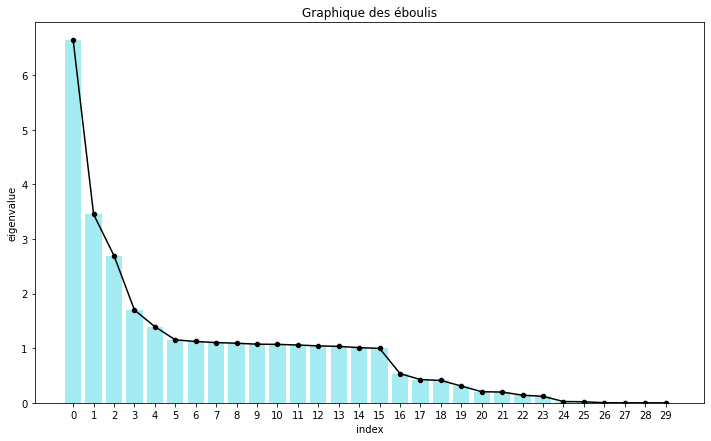

In [422]:
fig, axes = plt.subplots(figsize=(12, 7))
# Création d'un graphique à barres pour les valeurs propres.
sns.barplot(data=eigenvalues, x="index", y="eigenvalue", color="#98F5FF", ax=axes)
# Ajout d'un scatter plot pour les points des valeurs propres.
sns.scatterplot(data=eigenvalues, x="index", y="eigenvalue", color="black", ax=axes)
# Ajout d'une ligne pour connecter les points des valeurs propres.
sns.lineplot(data=eigenvalues, x="index", y="eigenvalue", color="black", ax=axes)
plt.title("Graphique des éboulis")
plt.show()

In [423]:
 # Création d'un DataFrame à partir des pourcentages d'inertie du modèle AFC.
pourcentage = pd.DataFrame({'pourcentage' : my_pca.eig_[1]})
pourcentage = pourcentage.reset_index() # Nous appliquons reset_index() pour récupérer les labels des dimensions pour le diagramme en barres.

pourcentage["index"] = pourcentage["index"].astype("category") # Conversion de la colonne "index" en type catégorie

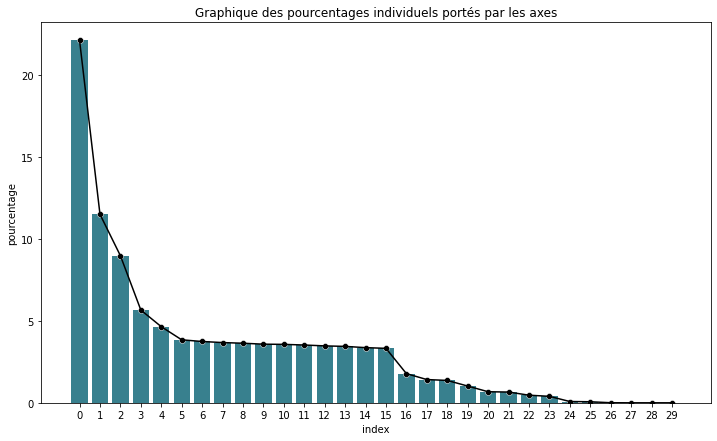

In [424]:
fig, axes = plt.subplots(figsize=(12, 7))
# Création d'un graphique à barres pour représenter les pourcentages.
sns.barplot(data=pourcentage, x="index", y="pourcentage", color="#2a8a9c", ax=axes)
# Création d'un graphique à barres pour représenter les pourcentages.
sns.scatterplot(data=pourcentage, x="index", y="pourcentage", color="black", ax=axes)
# Ajout d'une ligne pour connecter les points des pourcentages.
sns.lineplot(data=pourcentage, x="index", y="pourcentage", color="black", ax=axes)
# On obtient les valeurs minimales et maximales sur l'axe x.
xmin, xmax = axes.get_xlim() 
# On affiche une ligne horizontale qui représente le seuil de Kaiser.
plt.title("Graphique des pourcentages individuels portés par les axes")
plt.show()

In [425]:
cumsum = pd.DataFrame({'cumsum' : my_pca.eig_[2]}) # Création d'un DataFrame à partir des sommes cumulées d'inertie du modèle AFC.
cumsum = cumsum.reset_index() # Nous appliquons reset_index() pour récupérer les labels des dimensions pour le diagramme en barres.
# Conversion de la colonne "index" en type catégorie.
cumsum["index"] = cumsum["index"].astype("category")

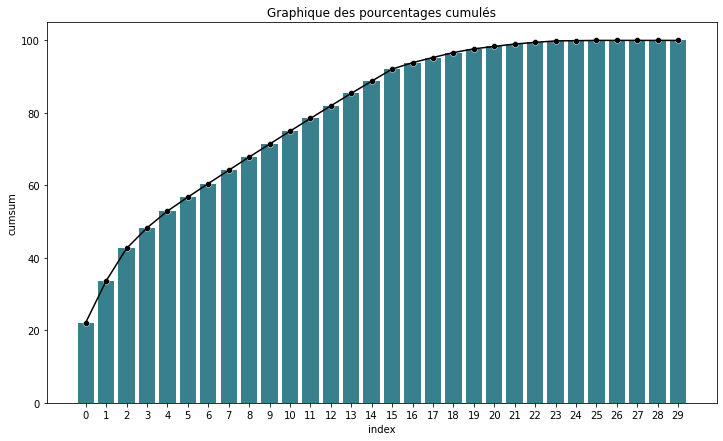

In [426]:
plt.figure(figsize=(12, 7))
# Création d'un graphique à barres pour représenter les pourcentages cumulés.
sns.barplot(data=cumsum, x="index", y="cumsum", color="#2a8a9c")
# Ajout d'un scatter plot pour les points des pourcentages cumulés.
sns.scatterplot(data=cumsum, x="index", y="cumsum", color="black")
# Ajout d'une ligne pour connecter les points des pourcentages cumulés.
sns.lineplot(data=cumsum, x="index", y="cumsum", color="black")
plt.title("Graphique des pourcentages cumulés")
plt.show()

### Information sur la relation entre les variables et les composantes

In [427]:
# On extrait les valeurs en relation avec les variables
df_cols = my_pca.col_topandas()

In [429]:
# On extrait la contribution des variables à la définition des composantes
var_contrib = df_cols.iloc[:,30:36]
var_contrib

,col_contrib_dim1,col_contrib_dim2,col_contrib_dim3,col_contrib_dim4,col_contrib_dim5,col_contrib_dim6
Surface reelle bati,5.714429,5.108398,1.205951,10.314695,1.025285,0.562091
Nombre pieces principales,5.309863,6.570670,1.087702,11.898596,1.946712,1.119698
Surface terrain,6.911761,3.600311,1.599256,0.571153,0.668908,0.449953
month,0.009033,0.001455,0.000079,0.162283,0.054441,0.107645
pop_active,3.134916,11.894732,10.655737,0.191458,0.826346,0.036255
salaire_moyen,6.872394,7.148757,2.323365,0.936086,1.171592,0.278144
nb_etab_elem,0.116428,7.204691,23.801423,0.280120,3.548214,0.144803
mean_prixm2,9.296811,6.244575,4.473208,0.000605,0.928343,0.217248
q1_prixm2,8.389854,6.700394,5.616640,0.228124,0.111637,0.028916
q3_prixm2,9.550530,5.801430,3.611569,0.060601,1.733397,0.269851


In [430]:
# On extrait la qualité de représentation des variables sur les composantes
var_cos2 = df_cols.iloc[:,60:66]
var_cos2

,col_cos2_dim1,col_cos2_dim2,col_cos2_dim3,col_cos2_dim4,col_cos2_dim5,col_cos2_dim6
Surface reelle bati,0.379159,0.176274,0.032474,1.751653e-01,0.014289,0.006482
Nombre pieces principales,0.352316,0.226732,0.029290,2.020633e-01,0.027131,0.012912
Surface terrain,0.458604,0.124235,0.043066,9.699393e-03,0.009322,0.005189
month,0.000599,0.000050,0.000002,2.755908e-03,0.000759,0.001241
pop_active,0.208006,0.410448,0.286943,3.251370e-03,0.011517,0.000418
salaire_moyen,0.455992,0.246680,0.062565,1.589672e-02,0.016328,0.003207
nb_etab_elem,0.007725,0.248610,0.640938,4.757036e-03,0.049450,0.001670
mean_prixm2,0.616855,0.215480,0.120457,1.026768e-05,0.012938,0.002505
q1_prixm2,0.556677,0.231208,0.151248,3.874029e-03,0.001556,0.000333
q3_prixm2,0.633689,0.200188,0.097254,1.029133e-03,0.024158,0.003112


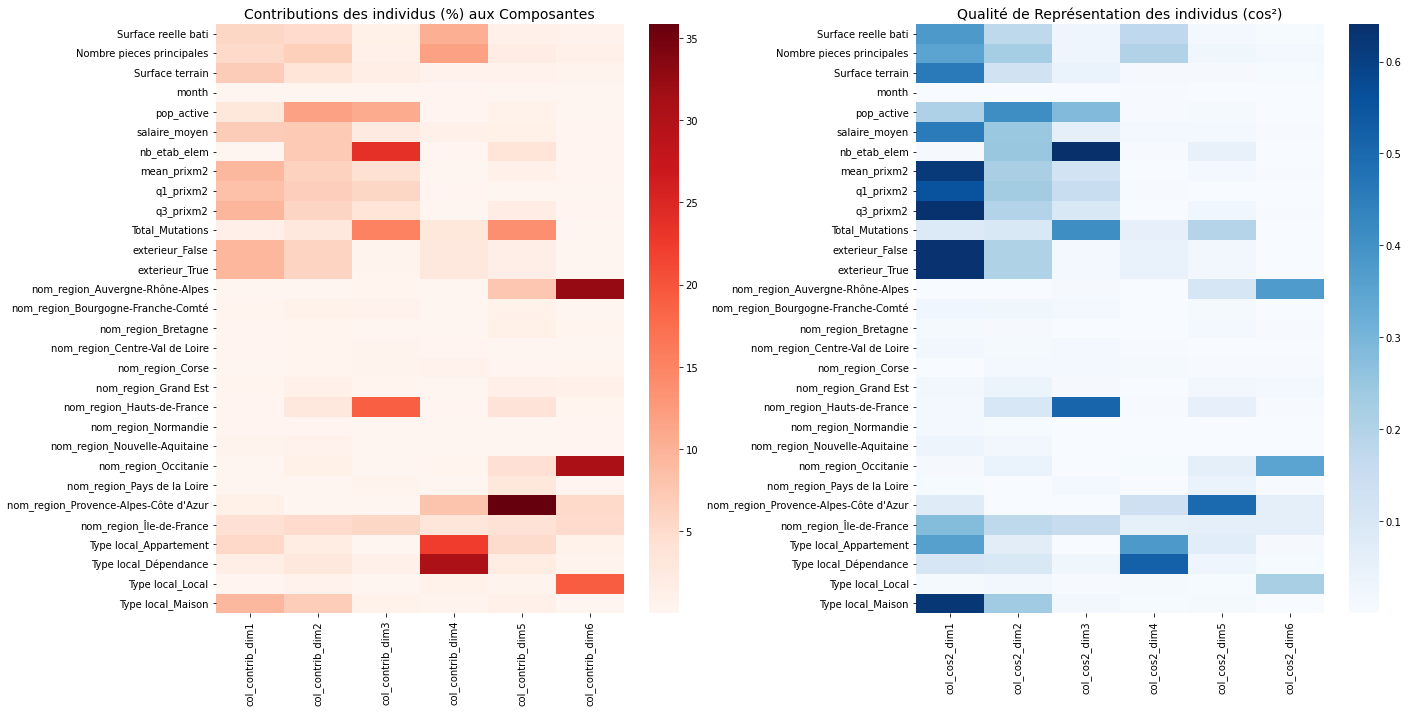

In [431]:
# On visualise les contributions et qualité de représentation grâce à des heatmaps.
fig = plt.figure(figsize=(20, 10))
spec = fig.add_gridspec(ncols=2, nrows=1)

ax0 = fig.add_subplot(spec[0, 0])
sns.heatmap(var_contrib, cmap="Reds", ax=ax0)
ax0.set_title("Contributions des individus (%) aux Composantes", fontsize=14)

ax1 = fig.add_subplot(spec[0, 1])
sns.heatmap(var_cos2, cmap="Blues", ax=ax1)
ax1.set_title("Qualité de Représentation des individus (cos²)", fontsize=14)


plt.tight_layout()
plt.show()

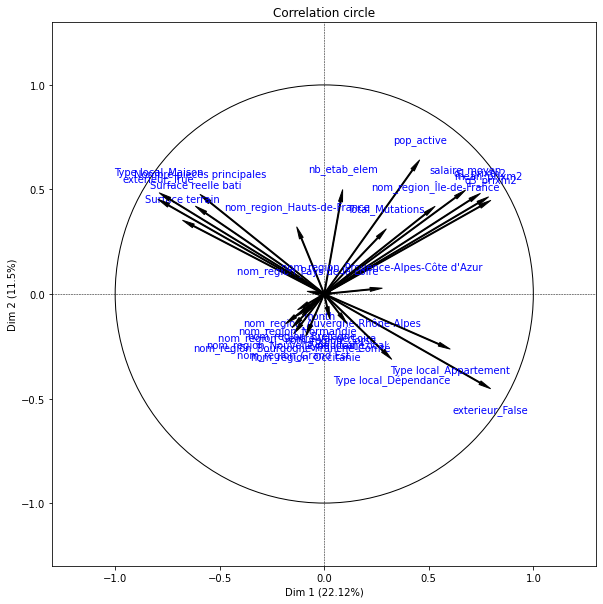

In [432]:
my_pca.correlation_circle(num_x_axis=1, num_y_axis=2, figsize=(20, 10))

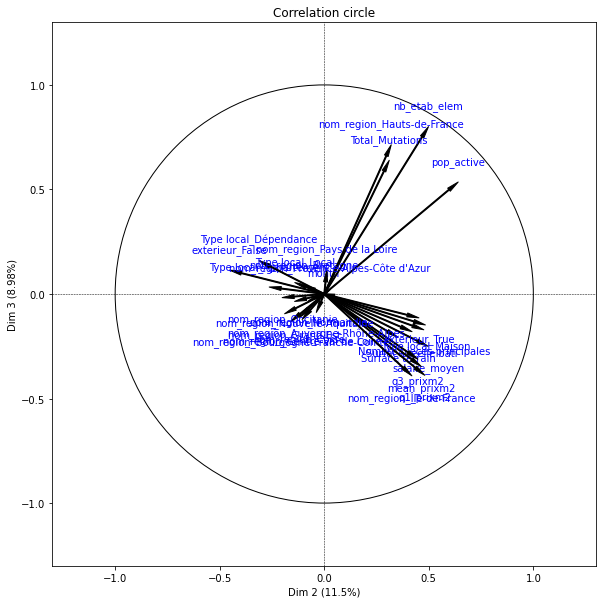

In [433]:
my_pca.correlation_circle(num_x_axis=2, num_y_axis=3, figsize=(20, 10))

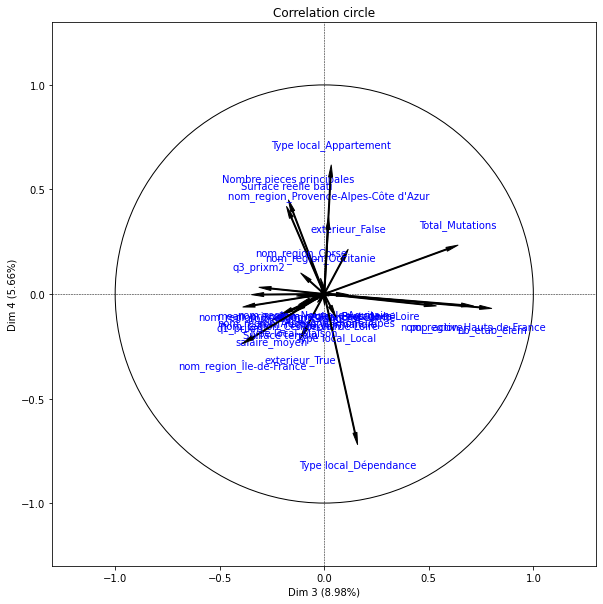

In [434]:
my_pca.correlation_circle(num_x_axis=3, num_y_axis=4, figsize=(20, 10))

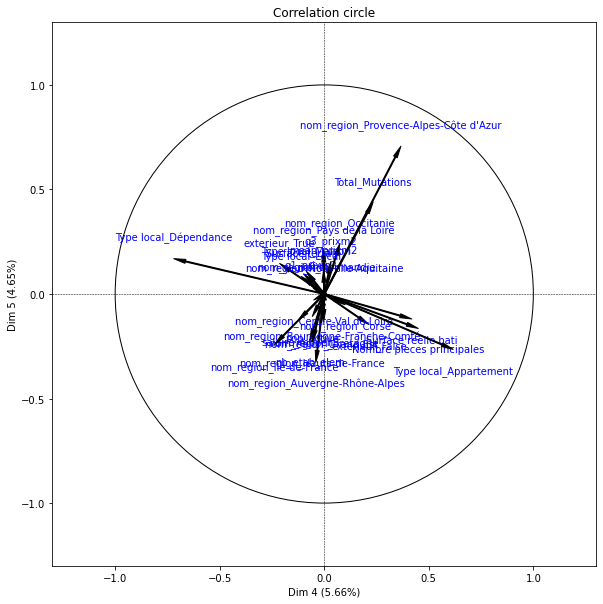

In [435]:
my_pca.correlation_circle(num_x_axis=4, num_y_axis=5, figsize=(20, 10))

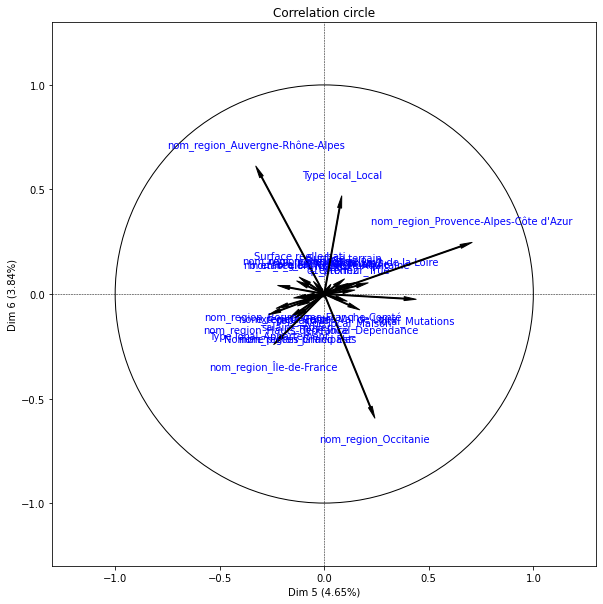

In [436]:
my_pca.correlation_circle(num_x_axis=5, num_y_axis=6, figsize=(20, 10))

### Extraction des coordonnées des invidus pour évaluer la corrélation entre les facteurs et notre variable cible

In [437]:
df_rows = my_pca.row_topandas()

In [440]:
ind_coord = df_rows.iloc[:,0:6]
ind_coord

,row_coord_dim1,row_coord_dim2,row_coord_dim3,row_coord_dim4,row_coord_dim5,row_coord_dim6
0,-2.858554,-0.573338,-0.820174,0.426254,0.815800,-1.759595
1,2.694757,0.341020,-0.660429,-4.022650,0.414836,-0.722391
2,4.977857,1.344249,-2.058526,0.341530,-0.926569,-0.695548
3,1.135504,3.610085,-1.864548,-1.316662,-0.416898,-0.571307
4,0.191669,2.088433,-0.489389,-1.164468,-0.447134,-0.575886
...,...,...,...,...,...,...
1085464,-3.228860,-0.380493,-0.703489,-0.152572,0.773114,0.115286
1085465,-2.244231,2.364992,0.229552,0.504927,0.503016,0.311178
1085466,1.661438,-0.768080,1.451829,1.521180,-0.556617,-0.138177
1085467,-1.270613,1.600528,0.684312,0.287432,0.420123,0.007789


In [441]:
# Pour chaque facteur, on calcule la corrélation
for col in ind_coord.columns:
    coef = np.corrcoef(y_train, ind_coord[col])
    print(coef)

[[1.         0.07551423]
 [0.07551423 1.        ]]
[[1.         0.45218301]
 [0.45218301 1.        ]]
[[ 1.        -0.1954636]
 [-0.1954636  1.       ]]
[[ 1.         -0.00986826]
 [-0.00986826  1.        ]]
[[1.         0.06303259]
 [0.06303259 1.        ]]
[[1.         0.03385475]
 [0.03385475 1.        ]]


## On crée notre pipeline qui comprend notre première pipeline de transformation puis qui applique une ACP (pour réaliser une AFDM)

In [478]:
afdm = Pipeline(
    steps=[("preprocessor", preprocessor), ("factorial", ACP(n_components=15))]
)
afdm

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Surface reelle bati',
                                                   'Nombre pieces principales',
                                                   'Surface terrain', 'month',
                                                   'pop_active',
                                                   'salaire_moyen',
                                                   'nb_etab_elem',
                                                   'mean_prixm2', 'q1_prixm2',
                                                   'q3_prixm2',
                                                   'Total_Mutations'])...
                                                                  ('standardize',
                                                                   <__main__.Qual_Standardize object at 0x00000213C0F498E0>)]),
                                                  ['exterieur', 'nom_region']),
                                                 ('local',
                                                  Pipeline(steps=[('na_imputer',
                                                                   <__main__.DecisionTreeImputer object at 0x00000213C0F49A30>),
                                                                  ('disjonctif',
                                                                   OneHotEncoder()),
                                                                  ('standardize',
                                                                   <__main__.Qual_Standardize object at 0x00000213807F2F10>)]),
                                                  ['Type local'])])),
                ('factorial', PCA(n_components=15))])

In [20]:
# Avec la cleaning part

final_pipeline = Pipeline(
    steps=[("cleaning", cleaning),("preprocessor", preprocessor), ("factorial", ACP(n_components=6))]
)
final_pipeline

Pipeline(steps=[('cleaning',
                 Pipeline(steps=[('droping',
                                  <__main__.DropUnnecess_Column object at 0x000002132DDC1B50>),
                                 ('date',
                                  <__main__.Extract_YearMonth object at 0x000002132DDC6040>),
                                 ('pop_active',
                                  <__main__.OpenData_Departement object at 0x000002132F7980D0>),
                                 ('salaire',
                                  <__main__.OpenData_Departement object at 0x000002132F798130>),
                                 ('ecole',
                                  <__main__.OpenData_De...
                                                                  ('standardize',
                                                                   <__main__.Qual_Standardize object at 0x000002132F7FF730>)]),
                                                  ['exterieur', 'nom_region']),
                                                 ('local',
                                                  Pipeline(steps=[('na_imputer',
                                                                   <__main__.DecisionTreeImputer object at 0x000002132F7FF070>),
                                                                  ('disjonctif',
                                                                   OneHotEncoder()),
                                                                  ('standardize',
                                                                   <__main__.Qual_Standardize object at 0x000002132F7FF220>)]),
                                                  ['Type local'])])),
                ('factorial', PCA(n_components=6))])

In [479]:
# On fait apprendre notre pipeline sur notre échantillon d'apprentissage
X_train_afdm = pd.DataFrame(afdm.fit_transform(X_train))
X_train_afdm.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-2.644249,-0.387828,0.766315,0.639458,0.537641,-0.724240,1.104374,-0.733286,1.460087,-0.900276,-0.841852,0.060344,-0.864013,1.052252,0.960168
1,3.009615,-1.015991,0.031003,-3.180967,1.366927,-0.678000,0.175557,-0.379027,0.114680,0.267712,-0.136288,-0.154927,0.356021,0.031992,0.808687
2,4.814210,0.066821,2.047763,-0.076761,-0.857642,-0.370278,0.238573,0.488750,0.125399,0.229868,-0.158766,-0.175369,0.185966,0.145095,-0.292389
3,2.193552,2.252335,2.285861,-1.556254,0.233783,-0.088887,0.515632,0.238228,0.129690,0.235740,-0.150102,-0.166787,0.210112,0.332912,0.074642
4,0.909729,1.334953,0.607256,-1.229584,-0.015839,-0.082112,0.629038,-0.700982,0.201018,0.258142,-0.146017,-0.166161,0.247429,0.303143,1.176465


In [480]:
X_train.shape

(1085469, 15)

In [481]:
X_train_afdm.shape

(1085469, 15)

In [482]:
# On transforme notre échantillon test en utilisant les informations tirées de l'échantillon d'apprentissage
X_test_afdm = pd.DataFrame(afdm.transform(X_test))
X_test_afdm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3.549206,-0.226153,0.856185,-0.046996,-1.162824,-0.514326,-0.051456,1.185006,0.137430,0.219589,-0.165529,-0.184356,0.159868,0.051855,-1.144165
1,-3.045035,1.293476,-0.095320,-0.421582,-0.487988,-0.038383,0.267487,-0.151820,0.158942,-0.091333,0.028551,0.204614,0.669953,0.052864,0.067078
2,1.231702,0.961113,-0.067443,-1.246216,-0.458248,0.869032,-0.434099,-1.774037,-0.298657,-1.292050,0.428638,0.247590,-1.176556,-0.763086,0.945650
3,-0.223127,-1.518390,-0.450030,0.735845,-1.179005,0.003109,1.543101,-0.122696,-0.658124,0.924015,-0.889241,-0.217861,-0.269008,-2.057523,0.713993
4,0.461780,-2.930887,1.838011,2.521164,-3.006383,1.705670,-2.119550,2.260835,5.867133,0.145137,0.677054,-2.762582,5.268714,-2.933781,4.022147


In [447]:
X_test.shape

(534634, 15)

In [448]:
X_test_afdm.shape

(534634, 6)

In [67]:
epoch = 10 # On établit combien de fois notre jeu de données passera entièrement par notre modèle de regression
batch_range = [2**5, 2**6, 2**7, 2**8]
num_samples = len(X_train_afdm) # On décrit la taille de l'échantillon d'apprentissage

In [74]:
d_results = {
    "batch_size":[],
    "mse":[],
    "alpha":[],
    "alpha_mse":[],
    "l1_ratio":[],
    "l1_mse":[]
}

In [56]:
# On remet l'index de y_train à 0 pour s'aligner avec notre X_train transformée.
y_train= y_train.reset_index().drop(columns=["index"])["Valeur fonciere"]

In [57]:
# On instantie notre modèle
sgd_regressor = SGDRegressor(loss='squared_error', penalty="elasticnet", learning_rate="invscaling", l1_ratio=0.8, shuffle=False)

In [70]:
for batch in batch_range:
    # Pour chaque epoch
    sgd_regressor = SGDRegressor(loss='squared_error', penalty="elasticnet", learning_rate="invscaling", l1_ratio=0.8, shuffle=False)
    for k in range(1,epoch+1):
        # On affiche la progression
        progress = (k/epoch)*100  
        print(f'Progression: Epoch {k}/{epoch} /  {progress}%')  

        # On mélange notre jeu de données 
        X_shuffled, y_shuffled = shuffle(X_train_afdm, y_train)

        # Pour chaque mini-batch, fait apprendre ce groupe de données au modèle grâce au partial_fit
        for i in range(0, num_samples, batch):                    
            X_mini_batch = X_shuffled[i:i+batch]
            y_mini_batch = y_shuffled[i:i+batch]

            # Tant que la taille du batch n'est pas égal à zéro, on continue
            if len(X_mini_batch) > 0:
                sgd_regressor.partial_fit(X_mini_batch, y_mini_batch)
            else:
                break

    # On prédit les valeurs de y pour l'échantillon test
    y_pred = sgd_regressor.predict(X_test_afdm)
    # On extrait la moyenne des résidus au carré
    mse = mean_squared_error(y_test, y_pred)
    # On affiche le socre du modèle.
    print(f"Mean Squared Error: {mse}")

    d_results["batch_size"].append(batch)
    d_results["mse"].append(mse)

Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progression: Epoch 6/10 /  60.0%
Progression: Epoch 7/10 /  70.0%
Progression: Epoch 8/10 /  80.0%
Progression: Epoch 9/10 /  90.0%
Progression: Epoch 10/10 /  100.0%
Mean Squared Error: 9480701400.46998
Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progression: Epoch 6/10 /  60.0%
Progression: Epoch 7/10 /  70.0%
Progression: Epoch 8/10 /  80.0%
Progression: Epoch 9/10 /  90.0%
Progression: Epoch 10/10 /  100.0%
Mean Squared Error: 9457751635.220026
Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progression: Epoch 6/10 /  60.0%
Progression: Epoch 7/10 /  70.0%
Progression: Epoch 8/10 /  80.

In [71]:
d_results

{'batch_size': [32, 64, 128, 256],
 'mse': [9480701400.46998,
  9457751635.220026,
  9469638834.537918,
  9583616495.661535]}

In [58]:
epoch = 10 # On établit combien de fois notre jeu de données passera entièrement par notre modèle de regression
batch_size =  2**7
num_samples = len(X_train_afdm) # On décrit la taille de l'échantillon d'apprentissage

In [71]:
# Pour chaque epoch
for alpha_val in [0.0001, 0.001, 0.01]:
    sgd_regressor = SGDRegressor(loss='squared_error', penalty="elasticnet", alpha=alpha_val,learning_rate='optimal', eta0=1, l1_ratio=0.8, shuffle=False)
    for k in range(1,epoch+1):
        # On affiche la progression
        progress = (k/epoch)*100  
        print(f'Progression: Epoch {k}/{epoch} /  {progress}%')  

        # On mélange notre jeu de données 
        X_shuffled, y_shuffled = shuffle(X_train_afdm, y_train)

        # Pour chaque mini-batch, fait apprendre ce groupe de données au modèle grâce au partial_fit
        for i in range(0, num_samples, batch_size):                    
            X_mini_batch = X_shuffled[i:i+batch_size]
            y_mini_batch = y_shuffled[i:i+batch_size]

            # Tant que la taille du batch n'est pas égal à zéro, on continue
            if len(X_mini_batch) > 0:
                sgd_regressor.partial_fit(X_mini_batch, y_mini_batch)
            else:
                break

    # On prédit les valeurs de y pour l'échantillon test
    y_pred = sgd_regressor.predict(X_test_afdm)
        # On extrait la moyenne des résidus au carré
    mse = mean_squared_error(y_test, y_pred)
        # On affiche le socre du modèle.
    d_results["alpha"].append(alpha_val)
    d_results["alpha_mse"].append(mse)
    print(f"Mean Squared Error: {mse}")

Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progression: Epoch 6/10 /  60.0%
Progression: Epoch 7/10 /  70.0%
Progression: Epoch 8/10 /  80.0%
Progression: Epoch 9/10 /  90.0%
Progression: Epoch 10/10 /  100.0%
Mean Squared Error: 9294636009.34478
Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progression: Epoch 6/10 /  60.0%
Progression: Epoch 7/10 /  70.0%
Progression: Epoch 8/10 /  80.0%
Progression: Epoch 9/10 /  90.0%
Progression: Epoch 10/10 /  100.0%
Mean Squared Error: 9272584673.296541
Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progression: Epoch 6/10 /  60.0%
Progression: Epoch 7/10 /  70.0%
Progression: Epoch 8/10 /  80.

In [265]:
# Pour chaque epoch
for l1_rat in [0, 0.25, 0.5, 0.75,1]:
    sgd_regressor = SGDRegressor(loss='squared_error', penalty="elasticnet", alpha=0.01,learning_rate='optimal', eta0=1, l1_ratio=l1_rat, shuffle=False)
    for k in range(1,epoch+1):
        # On affiche la progression
        progress = (k/epoch)*100  
        print(f'Progression: Epoch {k}/{epoch} /  {progress}%')  

        # On mélange notre jeu de données 
        X_shuffled, y_shuffled = shuffle(X_train_afdm, y_train)

        # Pour chaque mini-batch, fait apprendre ce groupe de données au modèle grâce au partial_fit
        for i in range(0, num_samples, batch_size):                    
            X_mini_batch = X_shuffled[i:i+batch_size]
            y_mini_batch = y_shuffled[i:i+batch_size]

            # Tant que la taille du batch n'est pas égal à zéro, on continue
            if len(X_mini_batch) > 0:
                sgd_regressor.partial_fit(X_mini_batch, y_mini_batch)
            else:
                break

    # On prédit les valeurs de y pour l'échantillon test
    y_pred = sgd_regressor.predict(X_test_afdm)
        # On extrait la moyenne des résidus au carré
    mse = mean_squared_error(y_test, y_pred)
        # On affiche le socre du modèle.
    d_results["l1_ratio"].append(alpha_val)
    d_results["l1_mse"].append(mse)
    print(f"Mean Squared Error: {mse}")

Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progression: Epoch 6/10 /  60.0%
Progression: Epoch 7/10 /  70.0%
Progression: Epoch 8/10 /  80.0%
Progression: Epoch 9/10 /  90.0%
Progression: Epoch 10/10 /  100.0%
Mean Squared Error: 7953515719.586854
Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progression: Epoch 6/10 /  60.0%
Progression: Epoch 7/10 /  70.0%
Progression: Epoch 8/10 /  80.0%
Progression: Epoch 9/10 /  90.0%
Progression: Epoch 10/10 /  100.0%
Mean Squared Error: 7973703819.643031
Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progression: Epoch 6/10 /  60.0%
Progression: Epoch 7/10 /  70.0%
Progression: Epoch 8/10 /  80

In [483]:
sgd_regressor = SGDRegressor(loss='squared_error', penalty="elasticnet", alpha=0.01,learning_rate='optimal', eta0=1, l1_ratio=0.75, shuffle=False)
for k in range(1,epoch+1):
        # On affiche la progression
        progress = (k/epoch)*100  
        print(f'Progression: Epoch {k}/{epoch} /  {progress}%')  

        # On mélange notre jeu de données 
        X_shuffled, y_shuffled = shuffle(X_train_afdm, y_train)

        # Pour chaque mini-batch, fait apprendre ce groupe de données au modèle grâce au partial_fit
        for i in range(0, num_samples, batch_size):                    
            X_mini_batch = X_shuffled[i:i+batch_size]
            y_mini_batch = y_shuffled[i:i+batch_size]

            # Tant que la taille du batch n'est pas égal à zéro, on continue
            if len(X_mini_batch) > 0:
                sgd_regressor.partial_fit(X_mini_batch, y_mini_batch)
            else:
                break

    # On prédit les valeurs de y pour l'échantillon test
y_pred = sgd_regressor.predict(X_test_afdm)
        # On extrait la moyenne des résidus au carré
mse = mean_squared_error(y_test, y_pred)
        # On affiche le socre du modèle.
print(f"Mean Squared Error: {mse}")

Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progression: Epoch 6/10 /  60.0%
Progression: Epoch 7/10 /  70.0%
Progression: Epoch 8/10 /  80.0%
Progression: Epoch 9/10 /  90.0%
Progression: Epoch 10/10 /  100.0%
Mean Squared Error: 6321556562.551569


In [484]:
# On calcule les résidus
res = y_test - y_pred

In [485]:
# On crée un dataframe avec nos valeurs prédites, observées et nos résidus.
df_graph = pd.DataFrame({'predicted':  y_pred,
              'observed': y_test,
              'residual': res})

df_graph.head(30)

,predicted,observed,residual
2016893,196496.367887,232000.0,35503.632113
28239,172779.744157,183000.0,10220.255843
1478571,211174.182127,142000.0,-69174.182127
1400805,134727.821005,200000.0,65272.178995
536215,140115.907688,97000.0,-43115.907688
19256,163392.558865,120000.0,-43392.558865
2062649,251742.941196,290000.0,38257.058804
1122794,145335.757958,161000.0,15664.242042
66618,174096.343896,310000.0,135903.656104
286896,178706.888798,99000.0,-79706.888798


In [495]:
df_graph.loc[abs(df_graph["residual"]) < abs(1000)].head(50)


,predicted,observed,residual
983347,209630.281341,210000.0,369.718659
620685,133074.582839,132850.0,-224.582839
778493,96289.676553,96500.0,210.323447
291773,98151.034973,98600.0,448.965027
1930907,274264.245075,274500.0,235.754925
1141546,179162.939441,180000.0,837.060559
941674,232464.387180,231900.0,-564.387180
1305404,206282.935061,206000.0,-282.935061
783960,97158.934254,97000.0,-158.934254
846047,84677.564257,85000.0,322.435743


In [496]:
X_test[X_test.index == 1162896].iloc[0]

Type local                        Maison
Surface reelle bati                150.0
Nombre pieces principales              5
Surface terrain                    530.0
exterieur                           True
year                                2020
month                                  7
nom_region                      Bretagne
pop_active                      331201.0
salaire_moyen                  14.337977
nb_etab_elem                         488
mean_prixm2                  2070.574254
q1_prixm2                       1287.644
q3_prixm2                      2458.0925
Total_Mutations                    14210
Name: 1162896, dtype: object

In [488]:
# On calcule les coefficients et la constante du modèle linéaire.
print("Intercept:", sgd_regressor.intercept_)
print("Coefficients:", sgd_regressor.coef_)

Intercept: [177789.7050092]
Coefficients: [ 6817.70391927 19632.86575702 17639.46388883 -2410.07744657
  9232.10440103  3044.13383569 -1090.91369259  2284.30089574
    75.20138583  1374.79463942 -1566.92948181 -2204.85366637
 -5158.66870778 -1009.0095683   5969.19659285]


<Axes: xlabel='predicted', ylabel='observed'>

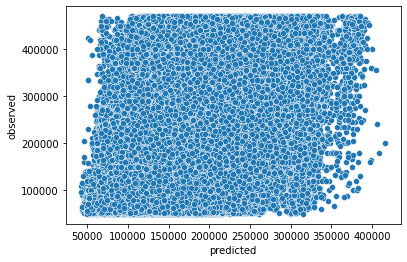

In [489]:
# On crée un nuage de points entre nos valeurs prédites et observées.
sns.scatterplot(x="predicted",y="observed", data=df_graph)